# Bootstrap

* A test code to simulate and compute how much each bootstrap sample overlaps the original data in average.

* Since each data point in a bootstrap sample is chosen from the original dataset with replacement, it has a significant overlap.

* Mathematically, for $i.i.d$ samples in the original dataset of size $n$, the probability of a single data point not to be chosen equals to $1-\frac{1}{n}$, thus the probability for a bootstrap sample equals to $\left(1-\frac{1}{n}\right)^n$.

* Therefore, by sending $n$ to the $\infty$,
$$ \lim_{n\rightarrow \infty}{\left(1-\frac{1}{n}\right)^n} = e^{-1}$$
which implies that the proportion of the overlapped data is $1-e^{-1}$.

* I simulated how the proportion of unseen data changes as $n$, the number of observations, increases with 10 bootstrap samples for each $n$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Theoretical value
np.exp(-1)

0.36787944117144233

In [3]:
def bootstrap(n:int, B:int) -> float:
    A = np.arange(start=1, stop=n+1, step=1)
    btsamples = [np.random.choice(A, size=A.shape[0], replace=True) for i in range(B)]
    unique = [(np.setdiff1d(A, item).shape[0] / item.shape[0]) for item in btsamples]
    return np.mean(unique)

In [4]:
idx = []
val = []
for i in range(100, 20001):
    mean_unique = bootstrap(n=i, B=10)
    if i % 100 == 0:
        print(f"# of samples: {i}\t\toverlapped with A :{1 - mean_unique:.6f}\tunseen: {mean_unique:.6f}")
        idx.append(i)
        val.append(mean_unique)

# of samples: 100		overlapped with A :0.641000	unseen: 0.359000
# of samples: 200		overlapped with A :0.636500	unseen: 0.363500
# of samples: 300		overlapped with A :0.632667	unseen: 0.367333
# of samples: 400		overlapped with A :0.627250	unseen: 0.372750
# of samples: 500		overlapped with A :0.630000	unseen: 0.370000
# of samples: 600		overlapped with A :0.630667	unseen: 0.369333
# of samples: 700		overlapped with A :0.637571	unseen: 0.362429
# of samples: 800		overlapped with A :0.628375	unseen: 0.371625
# of samples: 900		overlapped with A :0.630222	unseen: 0.369778
# of samples: 1000		overlapped with A :0.631500	unseen: 0.368500
# of samples: 1100		overlapped with A :0.633727	unseen: 0.366273
# of samples: 1200		overlapped with A :0.637083	unseen: 0.362917
# of samples: 1300		overlapped with A :0.636462	unseen: 0.363538
# of samples: 1400		overlapped with A :0.633500	unseen: 0.366500
# of samples: 1500		overlapped with A :0.632467	unseen: 0.367533
# of samples: 1600		overlapped wit

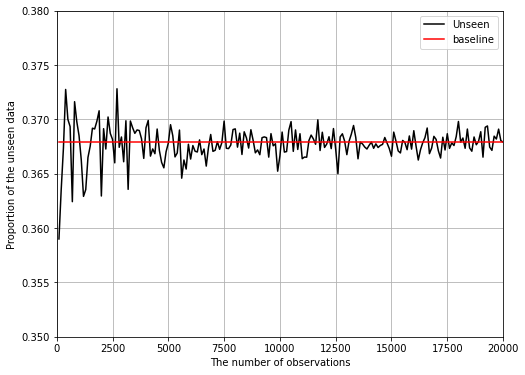

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(idx, val, 'k-', label="Unseen")
plt.plot(idx, [np.exp(-1)] * 200, 'r-', label="baseline")
plt.xlabel("The number of observations")
plt.ylabel("Proportion of the unseen data")
plt.xlim([-1, 20001])
plt.ylim([0.35, 0.38])
plt.legend()
plt.grid(True)
plt.show()

* This simulation verifies that the proportion of unseen data is around $e^{-1}$.

* Therefore, while using the bagging method, `Out-of-bag` error estimation is computed on those unseen data.